#**COVID-19 Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/covid_19_dataset.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.shape

(49068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [7]:
df.drop(columns = ['Province/State'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [9]:
df.rename(columns = {'Country/Region' : 'Country'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     49068 non-null  object 
 1   Lat         49068 non-null  float64
 2   Long        49068 non-null  float64
 3   Date        49068 non-null  object 
 4   Confirmed   49068 non-null  int64  
 5   Deaths      49068 non-null  int64  
 6   Recovered   49068 non-null  int64  
 7   Active      49068 non-null  int64  
 8   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


##**Problem Statements**

1. Determine the number of death by country on first and last date. And create a plot illustrating the distribution of death across countries.

2. Utilize the Facebook Prophet for Time Series forcasting to predict the next 14 days confirmed cases, active cases and recoveries.

In [11]:
 first_date = df[df['Date'] == df['Date'].min()]
 first_date

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
256,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [12]:
last_date = df[df['Date'] == df['Date'].max()]
last_date

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [13]:
#First Date

first_date_country = first_date.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
first_date_country

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,0,0,0,0
1,Albania,0,0,0,0
2,Algeria,0,0,0,0
3,Andorra,0,0,0,0
4,Angola,0,0,0,0
...,...,...,...,...,...
182,West Bank and Gaza,0,0,0,0
183,Western Sahara,0,0,0,0
184,Yemen,0,0,0,0
185,Zambia,0,0,0,0


In [14]:
last_date_country = last_date.groupby('Country')[['Confirmed',	'Deaths','Recovered'	,'Active']].sum().reset_index()
last_date_country

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [15]:
import plotly.express as px

In [16]:
#Data = first_date_country ---> Used here.

fig_first = px.choropleth(first_date_country, locations = 'Country', locationmode = 'country names', color = 'Deaths',
                    hover_name = 'Country', title = 'First Date Deaths',
                    range_color = [1,50], color_continuous_scale = 'Blues')
fig_first.show()

In [17]:
fig_last = px.choropleth(last_date_country, locations = 'Country', locationmode = 'country names',
                         title = 'Last Date Deaths',hover_name = 'Country', color = 'Deaths',
                         range_color = [1,50000], color_continuous_scale = 'Peach')
fig_last.show()

####**2. Utilize the Facebook Prophet for Time Series forecasting to predict the next 14 days confirmed cases, active cases,and recoveries.**

####***Note:***
- **Facebook Prophet:**
 - It is an open source tool for forecasting the Time Series Model.
 - It is used to perform the model onthe basis of combining the trends, seasonality, and noise.
  - Here, you have to make the data stationary and their is no need to find out the d, p, q, and s values.


In [18]:
df['Date']

,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
49063,2020-07-27
49064,2020-07-27
49065,2020-07-27
49066,2020-07-27


In [19]:
# Date column is Object datatype.
# Covert the Date column into Datetime datatype.
# Use Pandas Lib.

df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df['Date']

,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
49063,2020-07-27
49064,2020-07-27
49065,2020-07-27
49066,2020-07-27


In [23]:
total_confirm_case = df.groupby('Date')['Confirmed'].sum().reset_index()
total_confirm_case

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [24]:
total_recovered_case = df.groupby('Date')['Recovered'].sum().reset_index()
total_recovered_case

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [25]:
total_active_case = df.groupby('Date')['Active'].sum().reset_index()
total_active_case

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [26]:
from prophet import Prophet

In [29]:
# ds and y  ---> Very important for prophet
# ds = date column
# y = data
# Now convert Date column and data into ds and y.---> Important step.

total_confirm_case.rename(columns = {'Date' : 'ds',
                                     'Confirmed' : 'y'}, inplace = True)

# OR --> total_confirm_case.columns = ['ds', 'y']

total_confirm_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


###**Model Creation**

In [30]:
# Model
model = Prophet(interval_width = 0.95)  #Three values we can use here, i.e., 0.8, 0.9, and 0.95 --> Interval_width ==> Confidence Interval.

In [31]:
# Model Fitting
model.fit(total_confirm_case)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddzjgqe3/fki1j5pk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddzjgqe3/2whjsca_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13253', 'data', 'file=/tmp/tmpddzjgqe3/fki1j5pk.json', 'init=/tmp/tmpddzjgqe3/2whjsca_.json', 'output', 'file=/tmp/tmpddzjgqe3/prophet_modelpj15afng/prophet_model-20250509084429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:44:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
future = model.make_future_dataframe(periods = 14, freq = 'D')
future
# make_future_dataframe ---> Function
# periods is parameters ---> Assign numbers for future
# freq -->'D' == Day :: 'M' == Month :: 'Y' == Year

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


In [33]:
future_1 = model.predict(future)
future_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.889802e+05,1.228785e+05,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.767676e+05,1.528712e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.447283e+05,1.720023e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-1.584942e+05,1.811165e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.508501e+05,1.697847e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,1.817296e+07,1.794506e+07,1.837695e+07,1.799836e+07,1.833124e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.817184e+07
198,2020-08-07,1.837695e+07,1.815492e+07,1.861535e+07,1.818309e+07,1.855749e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.838703e+07
199,2020-08-08,1.858094e+07,1.834846e+07,1.884913e+07,1.835184e+07,1.878331e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.859469e+07
200,2020-08-09,1.878493e+07,1.851575e+07,1.905119e+07,1.852251e+07,1.900927e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.879223e+07


In [35]:
future_1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [36]:
# Here, only three important columns that need to be focused
# 'yhat' --> forecasting values for each time points
# 'yhat_lower' --> lower bound of the interval width (confidence interval)
# 'yhat_upper' ---> upper bound of the interval width

In [37]:
future_1[['yhat','yhat_lower', 'yhat_upper']] = future_1[['yhat','yhat_lower', 'yhat_upper']].astype('int')

In [38]:
future_1[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,-20676,-188980,122878
1,-8050,-176767,152871
2,5827,-144728,172002
3,12176,-158494,181116
4,8405,-150850,169784
...,...,...,...
197,18171841,17945063,18376952
198,18387030,18154917,18615353
199,18594690,18348463,18849129
200,18792229,18515751,19051187


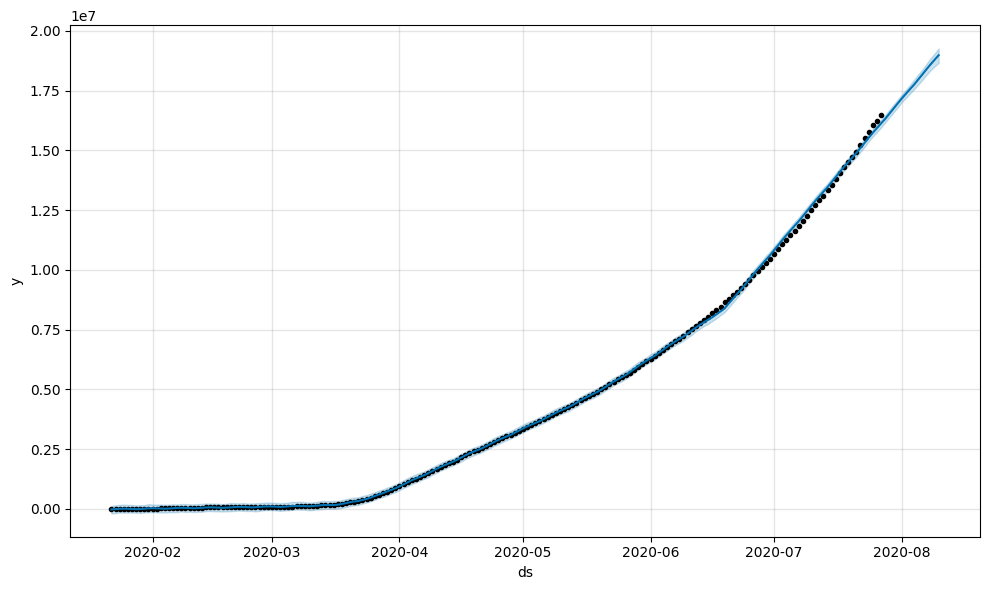

In [40]:
confirmed_plot = model.plot(future_1)

# model.plot(future_1) --> Save this in any variable name. Here, I'm using: confirmed_plot.
# Why it is important: Because if we don't save into variable it will give two same plot (one duplicate plot).

In [42]:
total_recovered_case.columns = ['ds', 'y']

In [44]:
total_recovered_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [49]:
model = Prophet(interval_width = 0.95)

In [50]:
model.fit(total_recovered_case)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddzjgqe3/c5wnfc9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddzjgqe3/2c2v_j1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75688', 'data', 'file=/tmp/tmpddzjgqe3/c5wnfc9v.json', 'init=/tmp/tmpddzjgqe3/2c2v_j1j.json', 'output', 'file=/tmp/tmpddzjgqe3/prophet_modelrrx6spb8/prophet_model-20250509095557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:55:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:55:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [52]:
future_recovery = model.make_future_dataframe(periods = 14, freq = 'D')
future_recovery

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


In [53]:
future_recovery_1 = model.predict(future_recovery)
future_recovery_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.360148e+04,-1.411548e+05,1.061728e+05,-1.360148e+04,-1.360148e+04,-4840.630407,-4840.630407,-4840.630407,-4840.630407,-4840.630407,-4840.630407,0.0,0.0,0.0,-1.844211e+04
1,2020-01-23,-1.243665e+04,-1.310627e+05,1.057384e+05,-1.243665e+04,-1.243665e+04,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,0.0,0.0,0.0,-1.118185e+04
2,2020-01-24,-1.127183e+04,-1.377145e+05,1.150073e+05,-1.127183e+04,-1.127183e+04,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,0.0,0.0,0.0,-5.175679e+03
3,2020-01-25,-1.010701e+04,-1.188313e+05,1.270195e+05,-1.010701e+04,-1.010701e+04,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,0.0,0.0,0.0,-4.075673e+02
4,2020-01-26,-8.942184e+03,-1.345599e+05,1.124802e+05,-8.942184e+03,-8.942184e+03,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,0.0,0.0,0.0,-9.825667e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,1.055043e+07,1.038589e+07,1.071124e+07,1.043454e+07,1.066924e+07,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,0.0,0.0,0.0,1.055169e+07
198,2020-08-07,1.068699e+07,1.051863e+07,1.085927e+07,1.056042e+07,1.082711e+07,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,0.0,0.0,0.0,1.069309e+07
199,2020-08-08,1.082355e+07,1.064157e+07,1.102608e+07,1.067933e+07,1.098468e+07,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,0.0,0.0,0.0,1.083325e+07
200,2020-08-09,1.096011e+07,1.076552e+07,1.116633e+07,1.079576e+07,1.114028e+07,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,0.0,0.0,0.0,1.095922e+07


In [59]:
future_recovery_1[['yhat','yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,-1.844211e+04,-1.411548e+05,1.061728e+05
1,-1.118185e+04,-1.310627e+05,1.057384e+05
2,-5.175679e+03,-1.377145e+05,1.150073e+05
3,-4.075673e+02,-1.188313e+05,1.270195e+05
4,-9.825667e+03,-1.345599e+05,1.124802e+05
...,...,...,...
197,1.055169e+07,1.038589e+07,1.071124e+07
198,1.069309e+07,1.051863e+07,1.085927e+07
199,1.083325e+07,1.064157e+07,1.102608e+07
200,1.095922e+07,1.076552e+07,1.116633e+07


In [60]:
future_recovery_1[['yhat','yhat_lower', 'yhat_upper']] = future_recovery_1[['yhat','yhat_lower', 'yhat_upper']].astype('int')

In [61]:
future_recovery_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          202 non-null    datetime64[ns]
 1   trend                       202 non-null    float64       
 2   yhat_lower                  202 non-null    int64         
 3   yhat_upper                  202 non-null    int64         
 4   trend_lower                 202 non-null    float64       
 5   trend_upper                 202 non-null    float64       
 6   additive_terms              202 non-null    float64       
 7   additive_terms_lower        202 non-null    float64       
 8   additive_terms_upper        202 non-null    float64       
 9   weekly                      202 non-null    float64       
 10  weekly_lower                202 non-null    float64       
 11  weekly_upper                202 non-null    float64       

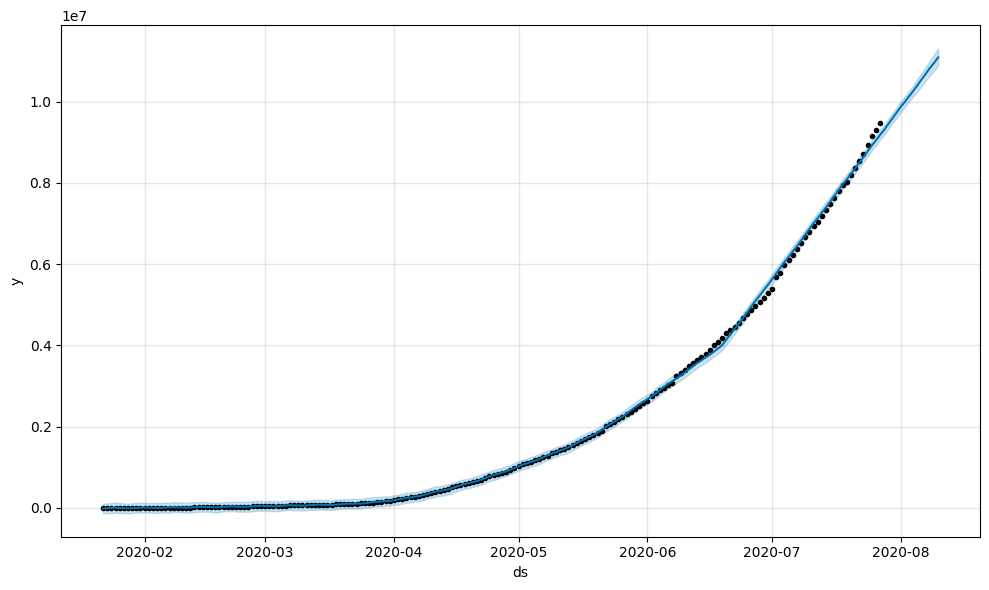

In [62]:
confirmed_recovery_plot = model.plot(future_recovery_1)

In [63]:
model = Prophet(interval_width = 0.95)

In [66]:
total_active_case.rename(columns = {'Date' : 'ds',
                                    'Active' : 'y'}, inplace = True)
total_active_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [67]:
model.fit(total_active_case)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddzjgqe3/ie1in0fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddzjgqe3/qs12de74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5776', 'data', 'file=/tmp/tmpddzjgqe3/ie1in0fe.json', 'init=/tmp/tmpddzjgqe3/qs12de74.json', 'output', 'file=/tmp/tmpddzjgqe3/prophet_modelnx1xb98n/prophet_model-20250509100802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [68]:
future_active = model.make_future_dataframe(periods = 14, freq = 'D')
future_active

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


In [69]:
future_active_1 = model.predict(future_active)
future_active_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.051890e+02,-7.883479e+04,5.980286e+04,-5.051890e+02,-5.051890e+02,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,0.0,0.0,0.0,-6.240003e+03
1,2020-01-23,1.357199e+03,-7.020131e+04,6.978279e+04,1.357199e+03,1.357199e+03,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,-1.186216e+03
2,2020-01-24,3.219587e+03,-6.039625e+04,7.927173e+04,3.219587e+03,3.219587e+03,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.450374e+03
3,2020-01-25,5.081975e+03,-6.265538e+04,7.811867e+04,5.081975e+03,5.081975e+03,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,8.209979e+03
4,2020-01-26,6.944363e+03,-5.488417e+04,8.878929e+04,6.944363e+03,6.944363e+03,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,1.509628e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,6.919689e+06,6.813768e+06,7.016180e+06,6.838067e+06,6.995166e+06,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,6.917146e+06
198,2020-08-07,6.981956e+06,6.878804e+06,7.087036e+06,6.887871e+06,7.071895e+06,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.985187e+06
199,2020-08-08,7.044224e+06,6.925470e+06,7.177994e+06,6.935092e+06,7.144120e+06,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,7.047352e+06
200,2020-08-09,7.106491e+06,6.975560e+06,7.247966e+06,6.985340e+06,7.220944e+06,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,7.114643e+06


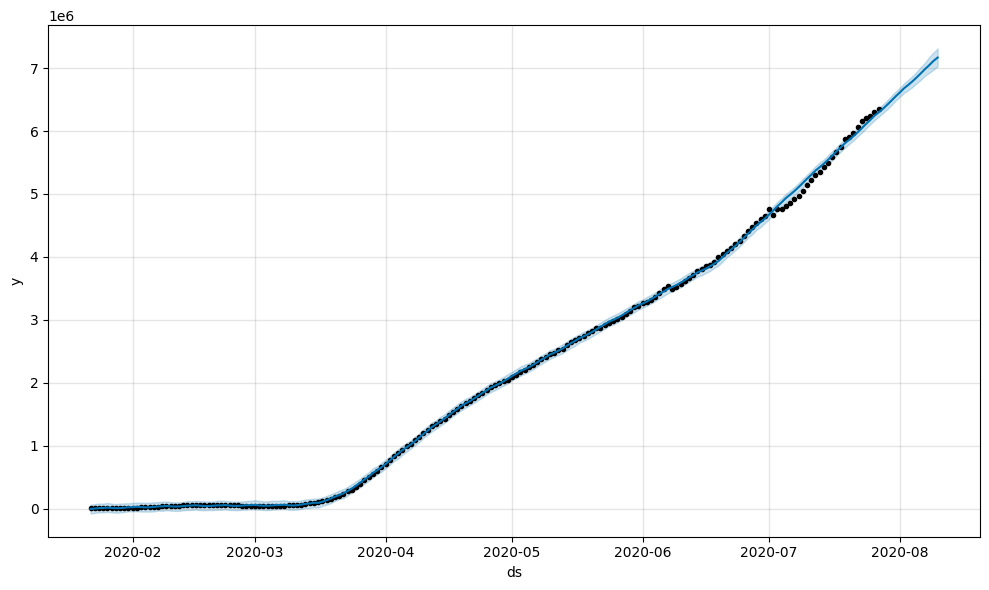

In [70]:
future_active_plot = model.plot(future_active_1)